In [4]:
!pip install pandas

import pandas as pd

df = pd.read_csv('gdp.csv')
df.head()


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Country Name,Country Code,Year,Value
0,Arab World,ARB,1968,2.576068e+10
1,Arab World,ARB,1969,2.843420e+10
2,Arab World,ARB,1970,3.138550e+10
3,Arab World,ARB,1971,3.642691e+10
4,Arab World,ARB,1972,4.331606e+10


## 1) How many unique Countries Data we're having in the dataset?

In [7]:
df['Country Name'].nunique()

256

## 2) How many years of Data we're having for India

In [14]:
df[df [ 'Country Name']== 'India'].nunique()

Country Name     1
Country Code     1
Year            57
Value           57
dtype: int64

## 3) Whats the world GDP in 1969?

In [ ]:

gdp_1969 = df[df['Year'] == 1969]


world_gdp_1969 = gdp_1969['Value'].sum()

print(f"World GDP in 1969: {world_gdp_1969:.2e}")


World GDP in 1969: 1.96e+13


## 4) Whats the % of GDP growth of India in Year 1994 (*as compare to 1993)?

In [20]:
# Filter GDP values for India in 1993 and 1994
gdp_1993 = df[(df['Country Name'] == 'India') & (df['Year'] == 1993)]['Value'].values[0]
gdp_1994 = df[(df['Country Name'] == 'India') & (df['Year'] == 1994)]['Value'].values[0]

# Calculate percentage growth
growth_percent = ((gdp_1994 - gdp_1993) / gdp_1993) * 100

print(f"GDP Growth of India in 1994 compared to 1993: {growth_percent:.2f}%")


GDP Growth of India in 1994 compared to 1993: 17.18%


# Tasks

### 1) Find GDP Growth of India from 1960 - 2016
### 2) Create a new columns named as GDP which shows the GDP growth of each country for that year
### 3) Create a graph of GDP Growth of India from 1960 - 2016

In [21]:
# Task 1
# Filter for India from 1960 to 2016
india_df = df[(df['Country Name'] == 'India') & (df['Year'].between(1960, 2016))].copy()

# Calculate year-over-year GDP growth (%)
india_df['GDP_Growth'] = india_df['Value'].pct_change() * 100

# Preview the result
print(india_df[['Year', 'Value', 'GDP_Growth']].head())


      Year         Value  GDP_Growth
6074  1960  3.653593e+10         NaN
6075  1961  3.870910e+10    5.948039
6076  1962  4.159907e+10    7.465879
6077  1963  4.777600e+10   14.848723
6078  1964  5.572687e+10   16.641979


In [ ]:
#Task 2
# Sort by country and year to ensure correct order
df_sorted = df.sort_values(by=['Country Name', 'Year']).copy()

# Calculate GDP growth (%) by group
df_sorted['GDP'] = df_sorted.groupby('Country Name')['Value'].pct_change() * 100

# Preview result
df_sorted.head()


,Country Name,Country Code,Year,Value,GDP
2306,Afghanistan,AFG,1960,5.377778e+08,NaN
2307,Afghanistan,AFG,1961,5.488889e+08,2.066111
2308,Afghanistan,AFG,1962,5.466667e+08,-0.404857
2309,Afghanistan,AFG,1963,7.511112e+08,37.398386
2310,Afghanistan,AFG,1964,8.000000e+08,6.508870
...,...,...,...,...,...
2401,Algeria,DZA,1984,5.369828e+10,10.034368
2402,Algeria,DZA,1985,5.793787e+10,7.895206
2403,Algeria,DZA,1986,6.369630e+10,9.938980
2404,Algeria,DZA,1987,6.674227e+10,4.782014


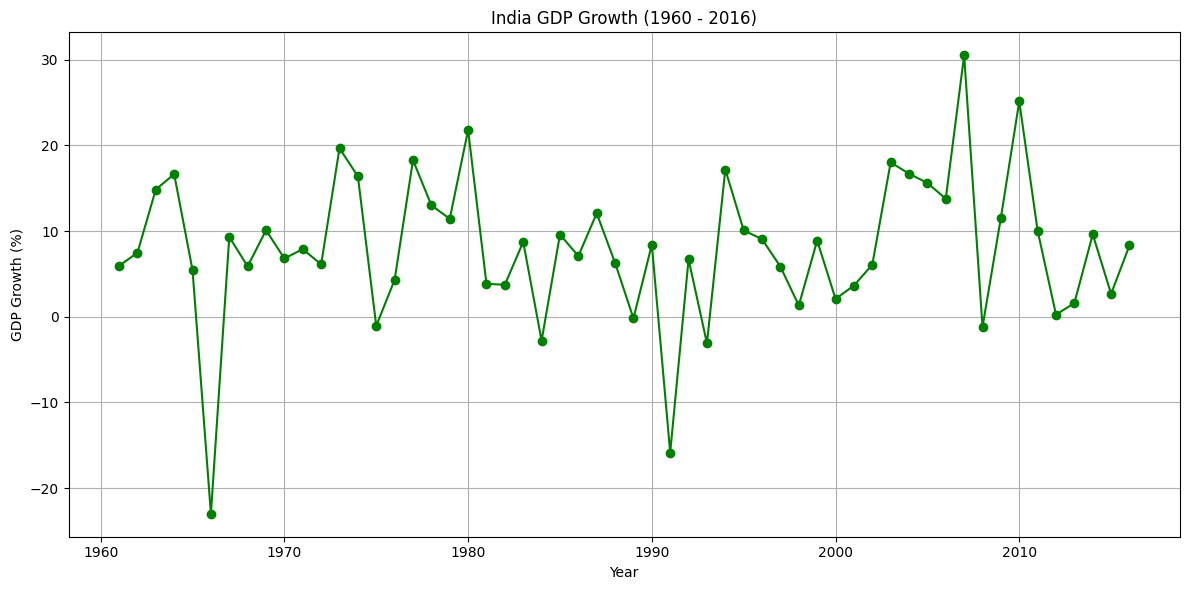

In [24]:
#Task 3
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(india_df['Year'], india_df['GDP_Growth'], marker='o', color='green')
plt.title('India GDP Growth (1960 - 2016)')
plt.xlabel('Year')
plt.ylabel('GDP Growth (%)')
plt.grid(True)
plt.tight_layout()
plt.show()
